# SaaS Company Sales Analysis - Linear Regression

This notebook attempts to perform linear regression on the sales data of a Software as a Service (SaaS) company, in the specific Amazon AWS, from 2020 to 2023. [Click here to see the dataset on Kaggle](https://www.kaggle.com/datasets/7750efed2f8651cf0e0ac9d161d36b9916dada803898bb585dbf67b6bd9d8c23).

[Click here](https://www.kaggle.com/code/gabrielenoaro/saas-company-aws-sales-exploratory-data-analys) to see the notebook containing the exploratory data analysis of the dataset and tata preprocessing.

If we find some linear relationship with at least one of the sales metrics in the data, we will perform linear regression to predict sales.

## Table of Contents

1. [Import Libraries](#import-libraries)
2. [Data processing](#data-preprocessing)
3. [Linear regression](#linear-regression)
4. [Conclusions](#conclusions)

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [4]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [6]:
data_cleaned = pd.read_pickle('SaaS_sales_data_cleaned.pkl')
data_500 = pd.read_pickle('data_500.pkl')
data_500_1000 = pd.read_pickle('data_500_1000.pkl')
data_cleaned_num = pd.read_pickle('data_cleaned_num.pkl')
data_cleaned_num_cont = pd.read_pickle('data_cleaned_num_cont.pkl')
top_correlated_features_data = pd.read_pickle('top_correlated_features_data.pkl')
standardized_data = pd.read_pickle('standardized_data.pkl')
standardized_data_only = pd.read_pickle('standardized_data_only.pkl')
standardized_2_data_only = pd.read_pickle('standardized_2_data_only.pkl')

## Data preprocessing

Before proceding with our tests we need to drop the non-standardized continuous variables to avoid repetitions.

In [5]:
standardized_data.columns

Index(['Discount', 'Product_Big Ol Database', 'Product_ChatBot Plugin',
       'Product_ContactMatcher', 'Product_Data Smasher', 'Product_FinanceHub',
       'Product_Marketing Suite', 'Product_Marketing Suite - Gold',
       'Product_SaaS Connector Pack', 'Product_SaaS Connector Pack - Gold',
       'Product_Site Analytics', 'Product_Storage', 'Product_Support',
       'Profit', 'Quantity', 'Sales', 'Profit_standardized',
       'Sales_standardized', 'Discount_standardized', 'Quantity_standardized'],
      dtype='object')

In [9]:
standardized_data_only = standardized_data.drop(['Profit', 'Quantity', 'Sales', 'Discount'], axis=1)
standardized_data_only.to_pickle('standardized_data_only.pkl')
standardized_data_only.head()

,Product_Big Ol Database,Product_ChatBot Plugin,Product_ContactMatcher,Product_Data Smasher,Product_FinanceHub,Product_Marketing Suite,Product_Marketing Suite - Gold,Product_SaaS Connector Pack,Product_SaaS Connector Pack - Gold,Product_Site Analytics,Product_Storage,Product_Support,Profit_standardized,Sales_standardized,Discount_standardized,Quantity_standardized
0,0,0,0,0,0,1,0,0,0,0,0,0,0.422028,0.644870,-0.755570,-0.780839
1,0,0,0,0,1,0,0,0,0,0,0,0,3.326802,3.058336,-0.755570,-0.316545
2,0,0,0,0,1,0,0,0,0,0,0,0,-0.150892,-0.625283,-0.755570,-0.780839
3,0,0,1,0,0,0,0,0,0,0,0,0,-6.525567,4.217041,1.420357,0.612045
4,0,0,0,0,0,0,1,0,0,0,0,0,-0.222093,-0.585495,0.211508,-0.780839


In [10]:
standardized_data_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9509 entries, 0 to 9993
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Product_Big Ol Database             9509 non-null   int64  
 1   Product_ChatBot Plugin              9509 non-null   int64  
 2   Product_ContactMatcher              9509 non-null   int64  
 3   Product_Data Smasher                9509 non-null   int64  
 4   Product_FinanceHub                  9509 non-null   int64  
 5   Product_Marketing Suite             9509 non-null   int64  
 6   Product_Marketing Suite - Gold      9509 non-null   int64  
 7   Product_SaaS Connector Pack         9509 non-null   int64  
 8   Product_SaaS Connector Pack - Gold  9509 non-null   int64  
 9   Product_Site Analytics              9509 non-null   int64  
 10  Product_Storage                     9509 non-null   int64  
 11  Product_Support                     9509 non-nul

In [11]:
standardized_data_only.describe()

,Product_Big Ol Database,Product_ChatBot Plugin,Product_ContactMatcher,Product_Data Smasher,Product_FinanceHub,Product_Marketing Suite,Product_Marketing Suite - Gold,Product_SaaS Connector Pack,Product_SaaS Connector Pack - Gold,Product_Site Analytics,Product_Storage,Product_Support,Profit_standardized,Sales_standardized,Discount_standardized,Quantity_standardized
count,9509.000000,9509.000000,9509.000000,9509.000000,9509.000000,9509.000000,9509.000000,9509.000000,9509.000000,9509.000000,9509.000000,9509.000000,9.509000e+03,9.509000e+03,9.509000e+03,9.509000e+03
mean,0.007151,0.083605,0.181512,0.078347,0.095173,0.021138,0.084026,0.100116,0.026712,0.086234,0.022820,0.163214,-4.483391e-18,-5.678962e-17,6.575640e-17,-2.988927e-18
std,0.084266,0.276809,0.385462,0.268731,0.293469,0.143851,0.277441,0.300170,0.161248,0.280724,0.149339,0.369580,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.110757e+00,-6.980806e-01,-7.555702e-01,-1.245134e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.356895e-01,-6.180323e-01,-7.555702e-01,-7.808393e-01
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.316811e-01,-4.541151e-01,2.115084e-01,-3.165446e-01
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.471026e-01,1.744397e-01,2.115084e-01,6.120448e-01
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.093854e+00,4.434788e+00,3.112744e+00,4.790697e+00


Let's check the shape of the data to see if we have enough samples for linear regression first.

In [12]:
standardized_data_only.shape

(9509, 16)

Amaizing, 9508 samples will do.

## Linear regression

We are going to try with linear regression, even if we don't have any strong correlation with the target variable, so it might not work.

However, before performing linear regression, we need to check if some other requirements are satisfied.

### Requirements for linear regression

1. Linearity: 
The relationship between the dependent variable and the independent variables should be linear. This means that the change in the dependent variable should be directly proportional to the change in the independent variables. If the relationship is not linear, the model may provide inaccurate predictions.
2. Independence: 
The observations should be independent of each other. Each observation should not influence or be influenced by other observations. In time series data, this often requires checking for autocorrelation, where observations are dependent on past values.
3. Homoscedasticity: 
The residuals (errors) of the regression model should have constant variance at every level of the independent variables. If the variance of the residuals varies (i.e., heteroscedasticity), it can indicate that the model is not properly capturing the relationship between the variables, and predictions could be unreliable. A common test for this is plotting residuals against fitted values.
4. Normality of Residuals: 
The residuals should be approximately normally distributed. Normality of residuals is important for making statistical inferences. While the normality of the residuals is not a strict requirement for the estimation of coefficients, it is crucial when constructing confidence intervals or conducting hypothesis tests.
5. No Perfect Multicollinearity: 
Independent variables should not be perfectly correlated with each other. Multicollinearity occurs when two or more independent variables in a regression model are highly correlated, making it difficult to distinguish their individual effects on the dependent variable. This can cause instability in coefficient estimates and make the model unreliable.
6. No Endogeneity: 
The independent variables should not be correlated with the error term. Endogeneity can arise from omitted variables, measurement errors, or simultaneity, leading to biased and inconsistent coefficient estimates.
7. Adequate Sample Size: 
There should be enough data points relative to the number of independent variables in the model. A common rule of thumb is to have at least 10 observations per predictor variable, though this can vary depending on the data. Having too few observations can lead to overfitting, where the model is too tailored to the sample data and may not generalize well to new data.

In [ ]:
# Define your target and features
y = standardized_data_only['Profit_standardized']
X = standardized_data_only.drop(columns=['Profit_standardized'])

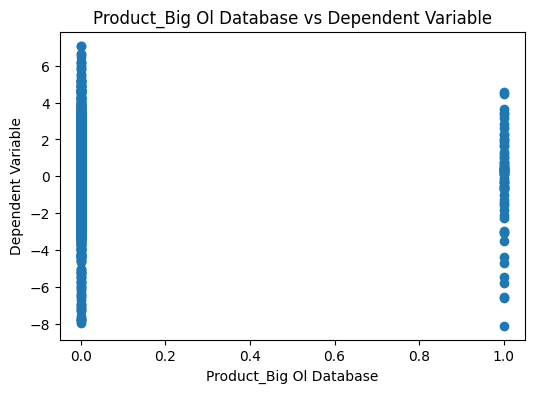

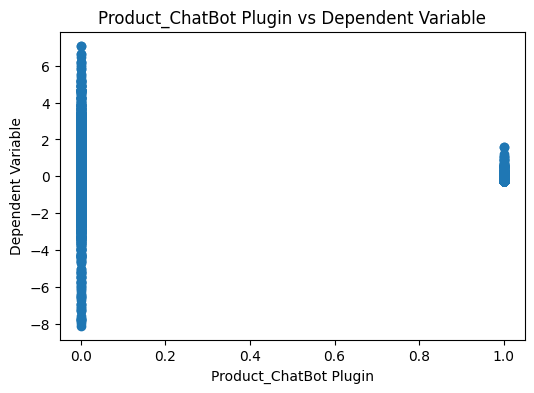

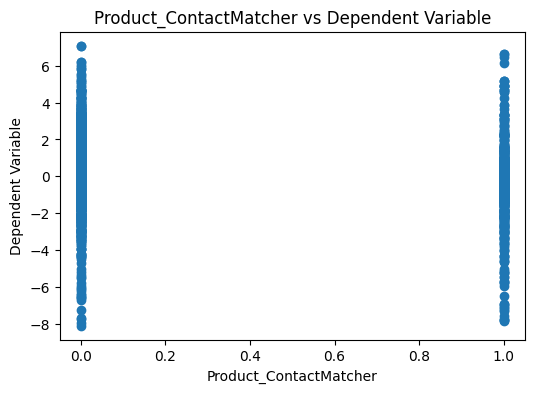

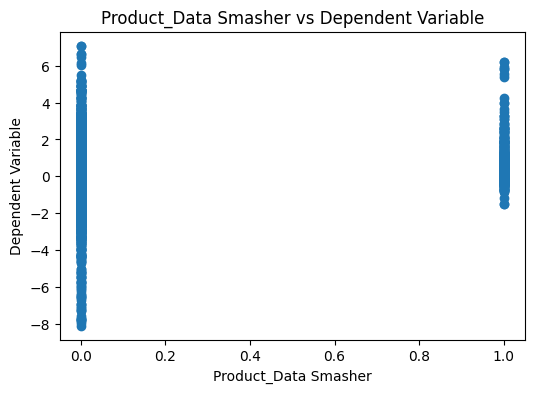

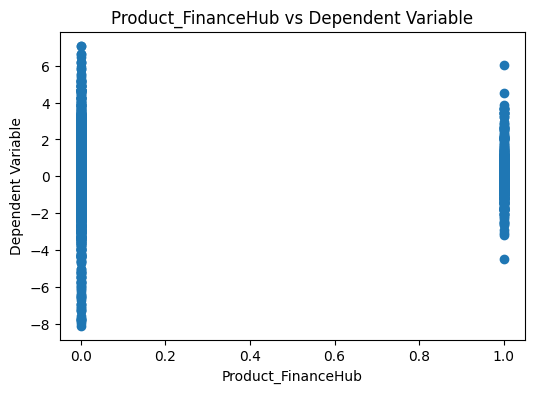

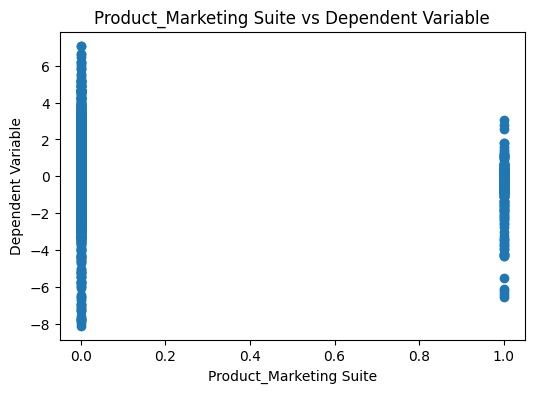

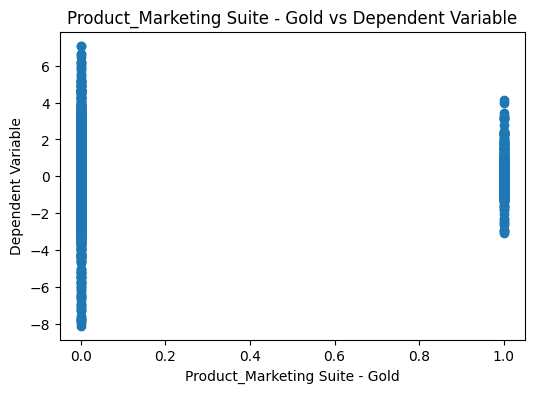

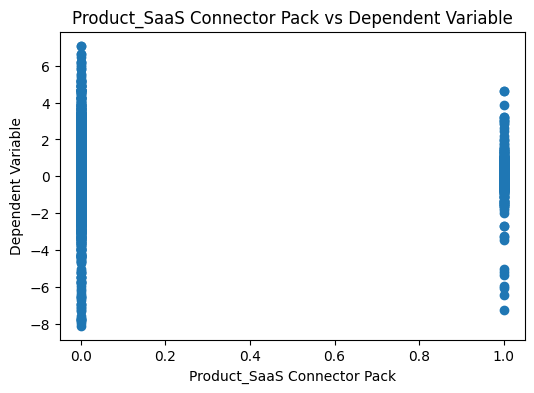

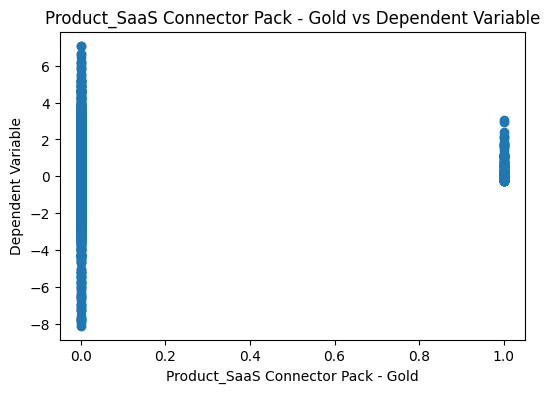

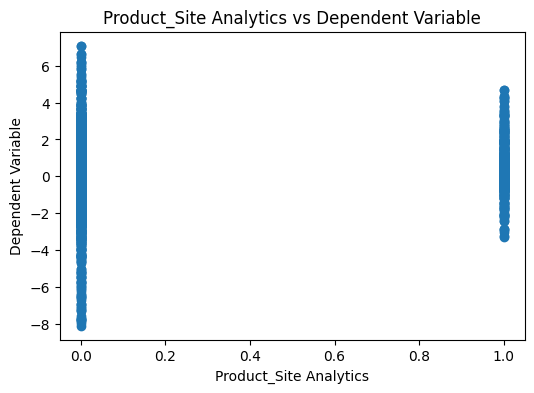

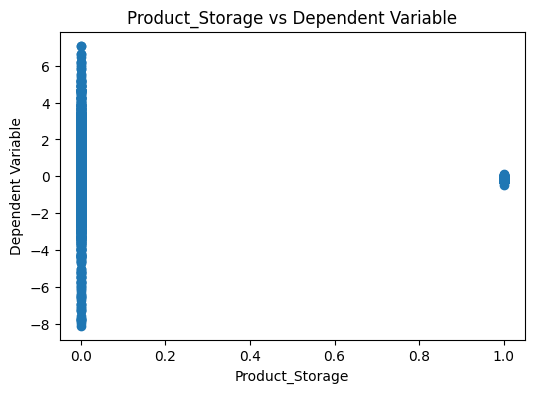

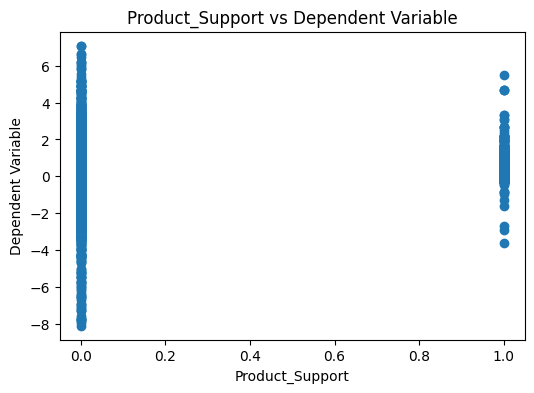

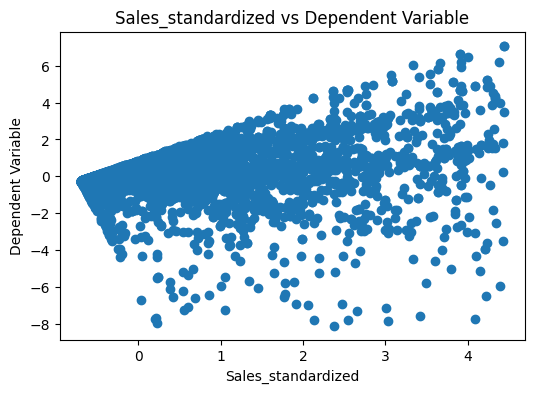

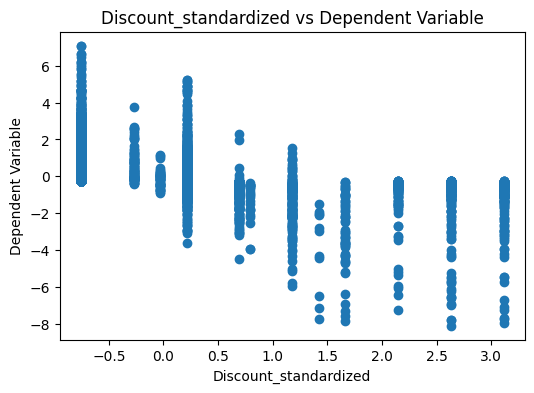

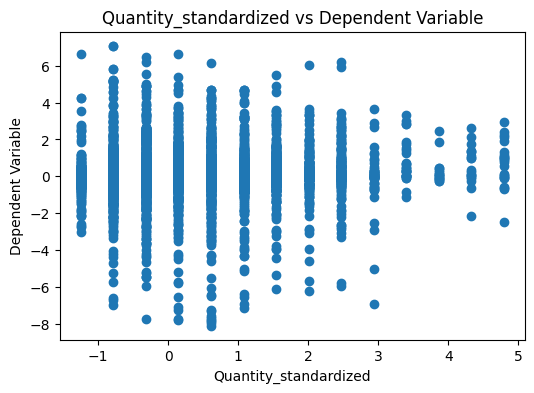

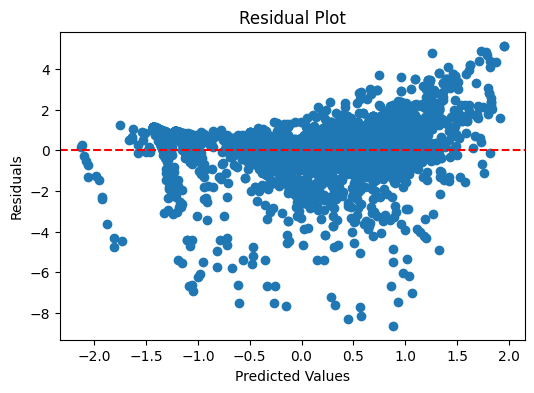

In [15]:
# Scatter plot for each feature
for column in X.columns:
    plt.figure(figsize=(6, 4))
    plt.scatter(X[column], y)
    plt.xlabel(column)
    plt.ylabel('Dependent Variable')
    plt.title(f'{column} vs Dependent Variable')
    plt.show()

# Residual Plot
model = sm.OLS(y, sm.add_constant(X)).fit()
predictions = model.predict(sm.add_constant(X))
residuals = y - predictions

plt.figure(figsize=(6, 4))
plt.scatter(predictions, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


Not every variable has a lienar relationship with the dependent variable, and we can say that the residuals are randomly scattered around 0 (even if they are not totally random and resable a linear pattern in some points). The lattest indicates homoscedasticity, which can lead to incorrect results in the linear regression model. This result might be influenced also by the presence of one hot encoded categorical variables.

In [17]:
# Breusch-Pagan test
bp_test = sms.het_breuschpagan(residuals, sm.add_constant(X))
print('Breusch-Pagan test p-value:', bp_test[1])


Breusch-Pagan test p-value: 0.0


A p-value near zero in the Breusch-Pagan test suggests that the null hypothesis of homoscedasticity (costant variance of residuals) is strongly rejected, in accordance with the plot of residuals.

In [16]:
dw_test = durbin_watson(residuals)
print(f'Durbin-Watson test statistic: {dw_test}')


Durbin-Watson test statistic: 2.012380561890351


The result of the Durbin-Watson test is very close to 2, and therefore we can say that there is no autocorrelation between the values.

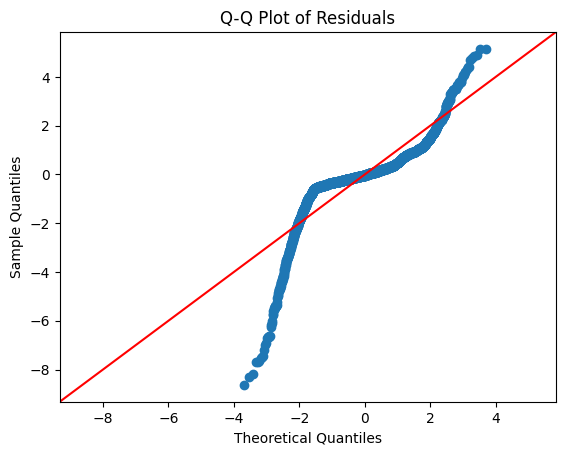

Shapiro-Wilk test p-value: 8.83595671054673e-82


c:\Users\noaro\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9509.
  res = hypotest_fun_out(*samples, **kwds)


In [18]:
# Q-Q Plot
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Shapiro-Wilk test
shapiro_test = stats.shapiro(residuals)
print('Shapiro-Wilk test p-value:', shapiro_test[1])


The positive part of the data resembles a normal distribution, perhaps becuase of the correlation between Profits and Sales. However, the negative part of the charts does not. The very small p-value means that the null hypothesis is rejected, and therefore the distribution is not normal.

In [19]:
# Calculating VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)


                               feature       VIF
0              Product_Big Ol Database  1.024312
1               Product_ChatBot Plugin  1.054069
2               Product_ContactMatcher  1.237660
3                 Product_Data Smasher  1.015066
4                   Product_FinanceHub  1.031721
5              Product_Marketing Suite  1.030518
6       Product_Marketing Suite - Gold  1.025706
7          Product_SaaS Connector Pack  1.008835
8   Product_SaaS Connector Pack - Gold  1.010260
9               Product_Site Analytics  1.049249
10                     Product_Storage  1.020554
11                     Product_Support  1.074893
12                  Sales_standardized  1.286333
13               Discount_standardized  1.354968
14               Quantity_standardized  1.060715


Every VIF score is significantly lower than 10, which means no multicollinearity between the variables. Therefore, this condition for linear regression is being satisfied.

In [20]:
n = standardized_data.shape[0]
p = standardized_data.shape[1]
print(f'Number of observations: {n}')
print(f'Number of predictors: {p}')


Number of observations: 9509
Number of predictors: 20


We've already checked for this but the dataset contains enough observations to perform linear regression.

It looks like some of the requirements for linear regression are not being satisfied, such as linearity, normality of residuals (not a strict requirement), and homoscedasticity. Let's try again with simplify the dataset by removing the one hot encoded variables.

In [7]:
standardized_continuous_data = standardized_data_only.drop(['Product_Big Ol Database', 'Product_ChatBot Plugin',
       'Product_ContactMatcher', 'Product_Data Smasher', 'Product_FinanceHub',
       'Product_Marketing Suite', 'Product_Marketing Suite - Gold',
       'Product_SaaS Connector Pack', 'Product_SaaS Connector Pack - Gold',
       'Product_Site Analytics', 'Product_Storage', 'Product_Support'], axis=1)
standardized_continuous_data.to_pickle('standardized_continuous_data.pkl')
print(standardized_continuous_data.head())
print(standardized_continuous_data.info())
print(standardized_continuous_data.describe())

   Profit_standardized  Sales_standardized  Discount_standardized  \
0             0.422028            0.644870              -0.755570   
1             3.326802            3.058336              -0.755570   
2            -0.150892           -0.625283              -0.755570   
3            -6.525567            4.217041               1.420357   
4            -0.222093           -0.585495               0.211508   

   Quantity_standardized  
0              -0.780839  
1              -0.316545  
2              -0.780839  
3               0.612045  
4              -0.780839  
<class 'pandas.core.frame.DataFrame'>
Index: 9509 entries, 0 to 9993
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Profit_standardized    9509 non-null   float64
 1   Sales_standardized     9509 non-null   float64
 2   Discount_standardized  9509 non-null   float64
 3   Quantity_standardized  9509 non-null   float64
dtypes: fl

In [11]:
# Define your target and features
y = standardized_continuous_data['Profit_standardized']
X = standardized_continuous_data.drop(columns=['Profit_standardized'])

Let's repeat the tests and see if this simplified dataset satisfies the requirements for linear regression.

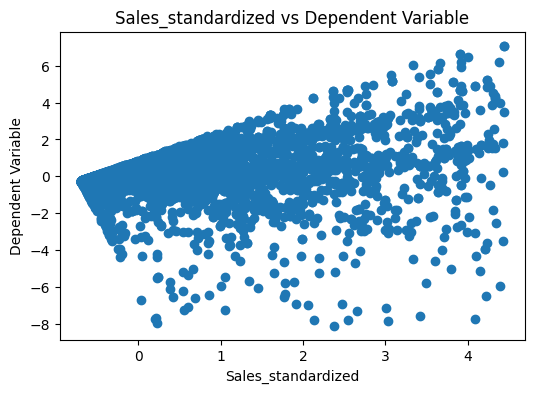

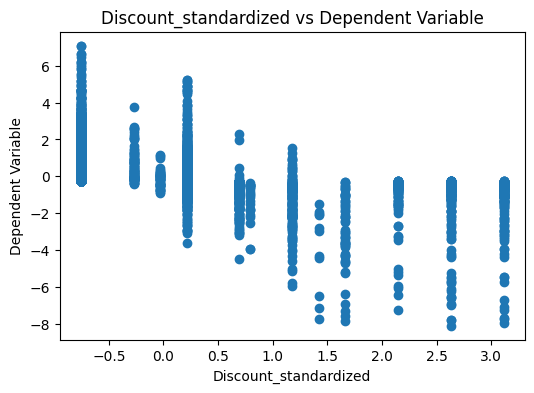

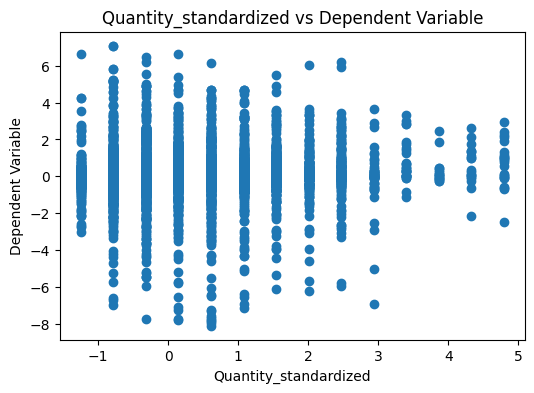

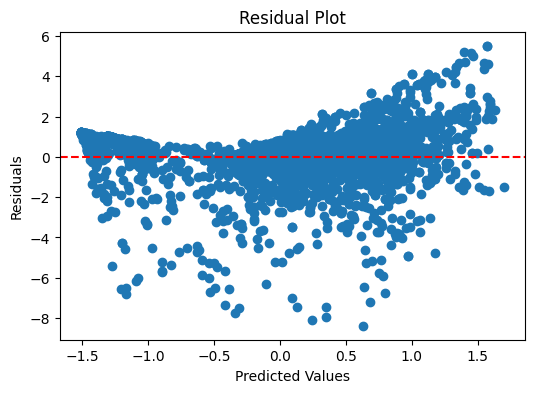

In [12]:
# Scatter plot for each feature
for column in X.columns:
    plt.figure(figsize=(6, 4))
    plt.scatter(X[column], y)
    plt.xlabel(column)
    plt.ylabel('Dependent Variable')
    plt.title(f'{column} vs Dependent Variable')
    plt.show()

# Residual Plot
model = sm.OLS(y, sm.add_constant(X)).fit()
predictions = model.predict(sm.add_constant(X))
residuals = y - predictions

plt.figure(figsize=(6, 4))
plt.scatter(predictions, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [13]:
# Breusch-Pagan test
bp_test = sms.het_breuschpagan(residuals, sm.add_constant(X))
print('Breusch-Pagan test p-value:', bp_test[1])

Breusch-Pagan test p-value: 0.0


In [14]:
dw_test = durbin_watson(residuals)
print(f'Durbin-Watson test statistic: {dw_test}')

Durbin-Watson test statistic: 2.0033420718518937


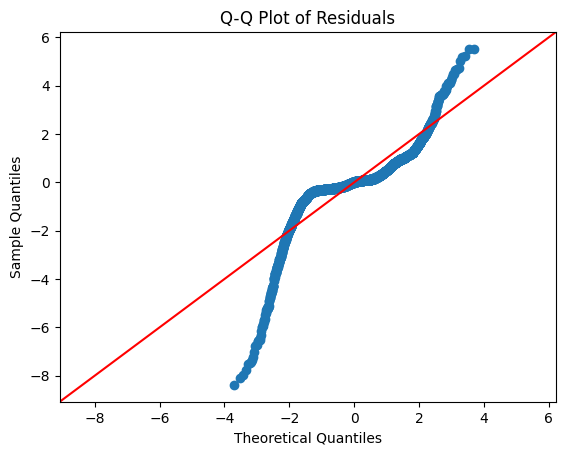

Shapiro-Wilk test p-value: 7.533113658105542e-82


c:\Users\noaro\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9509.
  res = hypotest_fun_out(*samples, **kwds)


In [15]:
# Q-Q Plot
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Shapiro-Wilk test
shapiro_test = stats.shapiro(residuals)
print('Shapiro-Wilk test p-value:', shapiro_test[1])

In [16]:
# Calculating VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

                 feature       VIF
0     Sales_standardized  1.040966
1  Discount_standardized  1.003814
2  Quantity_standardized  1.037809


In [18]:
n = standardized_continuous_data.shape[0]
p = standardized_continuous_data.shape[1]
print(f'Number of observations: {n}')
print(f'Number of predictors: {p}')

Number of observations: 9509
Number of predictors: 4


The results don't different significantly. Let's do one last attempt. Even if our main goal was to predict all profits with linear regression, which might not be possible. Let's try to predict at least positive profits, by removing the negative part of the data.

In [30]:
data_cleaned_num = data_500_1000.select_dtypes(include = ['float64', 'int64'])
data_cleaned_num.to_pickle('data_cleaned_num.pkl')
data_cleaned_num_cont = data_cleaned_num.drop(['Customer ID', 'Row ID'], axis=1)
data_cleaned_num_cont.to_pickle('data_cleaned_num_cont.pkl')
positive_profit = data_cleaned_num_cont[data_cleaned_num_cont['Profit'] > 0]
positive_profit.head()

,Sales,Quantity,Discount,Profit
0,261.960,2,0.0,41.9136
1,731.940,3,0.0,219.5820
2,14.620,2,0.0,6.8714
4,22.368,2,0.2,2.5164
5,48.860,7,0.0,14.1694


In [36]:
# Make a copy of the dataframe to keep the original data intact
standardized_data_2 = positive_profit.copy()

# Specify the columns to be standardized
columns_to_standardize = ['Profit', 'Sales', 'Discount', 'Quantity']

# Subset the dataframe to select the specified columns for standardization
variables_to_standardize = positive_profit[columns_to_standardize]

# Perform standardization (z-score normalization) using StandardScaler
scaler = StandardScaler()
scaled_values = scaler.fit_transform(variables_to_standardize)

# Add standardized values as new columns to the copy of the original dataframe
for i, col in enumerate(columns_to_standardize):
    standardized_data_2[f'{col}_standardized'] = scaled_values[:, i]

standardized_2_data_only = standardized_data_2.drop(['Profit', 'Sales', 'Discount', 'Quantity'], axis=1)
standardized_2_data_only.to_pickle('standardized_2_data_only.pkl')

# Check the structure of the standardized data
standardized_2_data_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7674 entries, 0 to 9993
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Profit_standardized    7674 non-null   float64
 1   Sales_standardized     7674 non-null   float64
 2   Discount_standardized  7674 non-null   float64
 3   Quantity_standardized  7674 non-null   float64
dtypes: float64(4)
memory usage: 299.8 KB


In [38]:
# Define your target and features
y = standardized_2_data_only['Profit_standardized']
X = standardized_2_data_only.drop(columns=['Profit_standardized'])

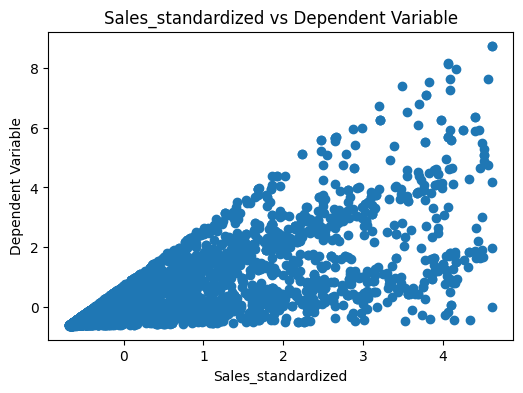

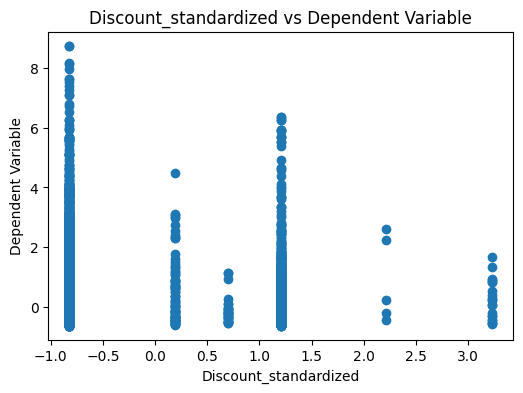

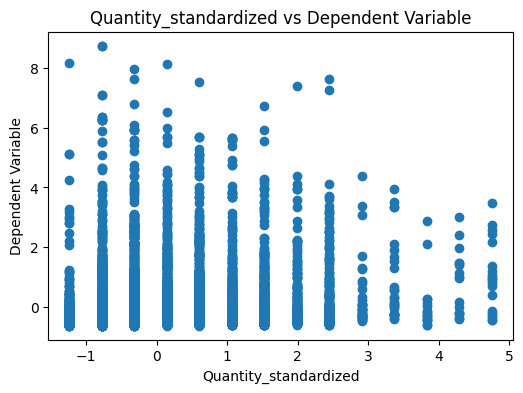

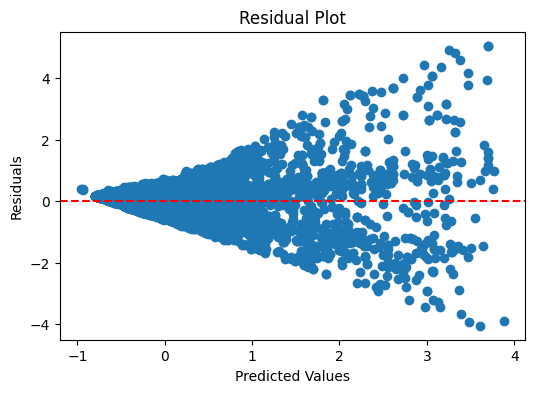

In [39]:
# Scatter plot for each feature
for column in X.columns:
    plt.figure(figsize=(6, 4))
    plt.scatter(X[column], y)
    plt.xlabel(column)
    plt.ylabel('Dependent Variable')
    plt.title(f'{column} vs Dependent Variable')
    plt.show()

# Residual Plot
model = sm.OLS(y, sm.add_constant(X)).fit()
predictions = model.predict(sm.add_constant(X))
residuals = y - predictions

plt.figure(figsize=(6, 4))
plt.scatter(predictions, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [40]:
# Breusch-Pagan test
bp_test = sms.het_breuschpagan(residuals, sm.add_constant(X))
print('Breusch-Pagan test p-value:', bp_test[1])

Breusch-Pagan test p-value: 0.0


In [41]:
dw_test = durbin_watson(residuals)
print(f'Durbin-Watson test statistic: {dw_test}')

Durbin-Watson test statistic: 1.9685576741115647


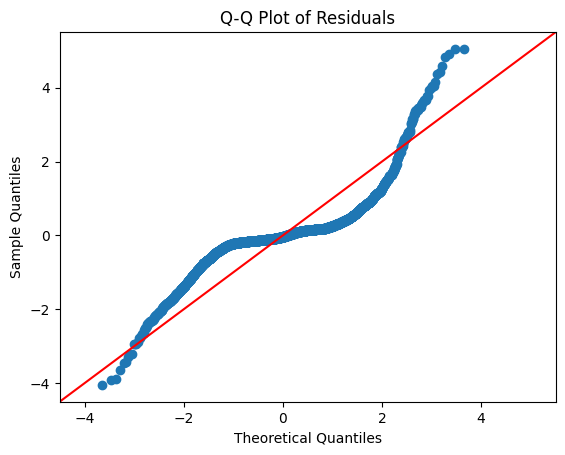

Shapiro-Wilk test p-value: 1.6876691997630816e-73


c:\Users\noaro\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7674.
  res = hypotest_fun_out(*samples, **kwds)


In [42]:
# Q-Q Plot
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Shapiro-Wilk test
shapiro_test = stats.shapiro(residuals)
print('Shapiro-Wilk test p-value:', shapiro_test[1])

In [43]:
# Calculating VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

                 feature       VIF
0     Sales_standardized  1.036576
1  Discount_standardized  1.000171
2  Quantity_standardized  1.036403


The results are slightly better, but not significantly better, and therefore the requirements for linear regressions are not satisfied. However, according to the Central Limit Theorem, especially with large samples, the linear regression could still provide unbiased estimates of coefficient even if the residuals are not normally distributed.

Therefore, if we take the results with a grain of sailt, we can still attempt a linear regression to predict the full range of profits of AWS.

In [8]:
lr = LinearRegression()

In [9]:
#Define and load the predictor (X) and Target(y) variables
y_col = 'Profit_standardized'

X = standardized_data_only.drop(y_col, axis=1)
y = standardized_data_only[y_col]

In [10]:
#Create polynomial features
pf = PolynomialFeatures(degree=2, include_bias=False)
X_pf = pf.fit_transform(X)

In [11]:
#Split the data into the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pf, y, test_size=0.3, 
                                                    random_state=42)

In [16]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [13]:
r2_score(y_test,y_pred)

0.7267316461181057

In [52]:
mean_squared_error(y_test, y_pred)

np.float64(0.2635605067050805)

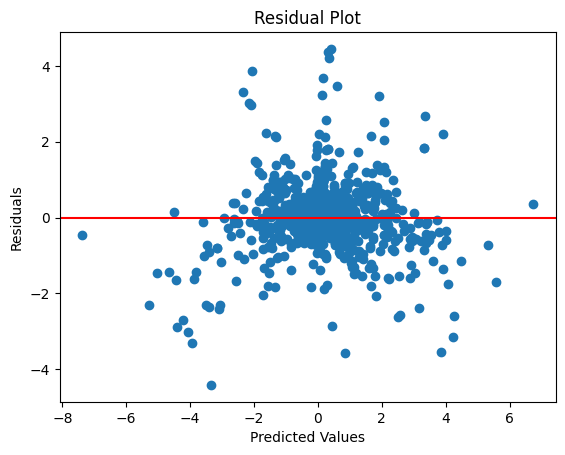

In [55]:
# Residuals
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

The R^2 score looks relatively high, so apparently the model is predicting Profit relatively well. Even if we need to keep in mind that not all assumptions for linear regression were satisfied.

Let's plot the predicted Vs the actual values.

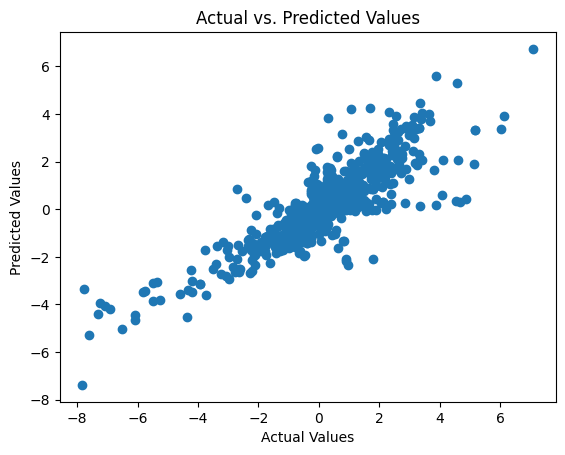

In [21]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

We can see that most of the predicted and actual values form a line, which means that they are very similar in values, enche the 72.6% R^2.

Let's print and save the coeficcients of the model in a csv file.

In [20]:

# Ensure X_train is a DataFrame
if not isinstance(X_train, pd.DataFrame):
    X_train = pd.DataFrame(X_train)

# Getting the coefficients as a DataFrame
coefficients = pd.DataFrame(lr.coef_.reshape(1, -1), columns=X_train.columns)

# Save coefficients to a CSV file
coefficients.to_csv('linear_regression_coefficients.csv', index=False)

# If you want to include the intercept as well:
intercept = pd.DataFrame([model.intercept_], index=['Intercept'], columns=['Coefficient'])
coefficients = pd.concat([intercept, coefficients.T], axis=0)

print(coefficients)


           Coefficient             0
Intercept    -0.002503           NaN
0                  NaN  6.516663e+12
1                  NaN -7.866449e+10
2                  NaN  5.326096e+11
3                  NaN  8.033963e+11
...                ...           ...
130                NaN -9.038086e-01
131                NaN -3.295898e-02
132                NaN -1.025391e-01
133                NaN -3.515625e-02
134                NaN  2.298737e-02

[136 rows x 2 columns]


## Conclusions

In this notebook we normalized the data and checked if the dataset satisfied the different requirements for linear regression: linearity, independence, homoscedasticity, normality of residuals, no perfect multicollinearity, no endogeneity, and an adequate sample size. The dataset did not satisfy all the requirements, but we decided to perform linear regression anyway. We got 72.6% R^2 which means the model fitted the data fairly well, but results need to be taken with a grain of salt because not all requisites for linear regression were satisfied.

The next steps could involve further manipulation of the dataset, so it can better astisfy the requirements for linear regression. Moreover, other type of models can be made, for example by using neural networks.

This notebook shows how simple models such as linear regression can be quite powerful in forecasting price. However, in some cases neural networks can do even better, for example, if we were to predict profits as time series data we could use Recurring Neural Networks (RNN).